## Importing Important Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Creating dataframes

In [3]:
titanic_data = pd.read_csv('data/train.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.shape

(891, 12)

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#remove missing/null values
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [9]:
#replacing missing values with mean number
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
#lets fix embarked
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [13]:
print(titanic_data['Embarked'].mode()[0])

S


In [14]:
#replace the mode value with the missing value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [15]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#how many survived?
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
#visualizing data
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

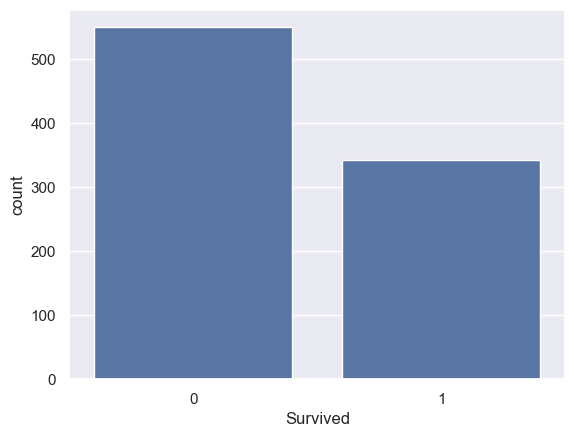

In [20]:

sns.countplot(x='Survived', data=titanic_data)

In [21]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

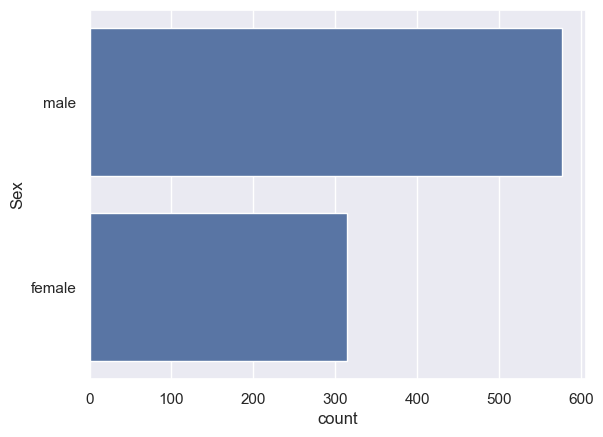

In [22]:
# count plot for "Sex" column
sns.countplot(titanic_data['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

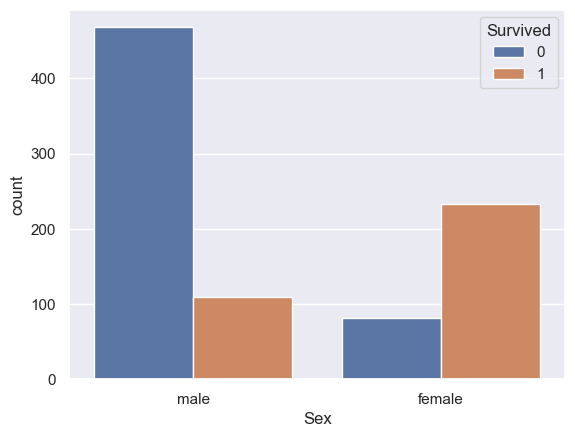

In [23]:
# Analysing Gender wise survivors
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

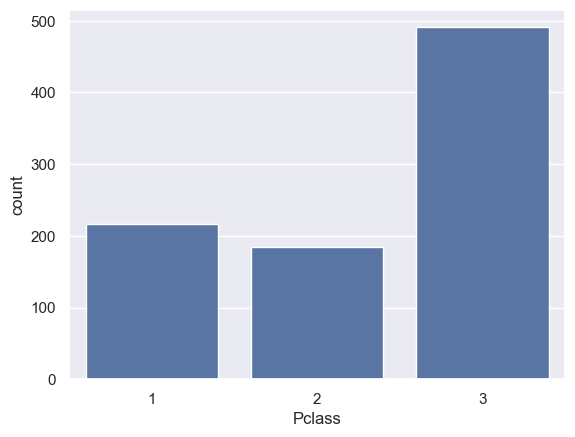

In [24]:
# count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

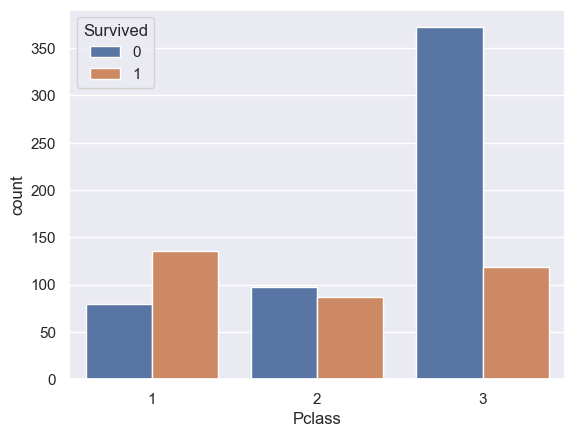

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

In [26]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [28]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [29]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [30]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [31]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


## Logistical regression and model training

In [35]:
model = LogisticRegression()

In [36]:
#use the train data on logisticregression model
model.fit(X_train, Y_train)

f:\Zomato Data Analysis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## evaluating and testing the model

In [37]:
X_train_prediction = model.predict(X_train)

In [38]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [39]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [40]:
#check accuracy of test data
X_test_prediction = model.predict(X_test)

In [41]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [42]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7821229050279329


In [43]:
#ends...but
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [45]:
!pip install pyngrok

import subprocess
import os
from pyngrok import ngrok
#setup ngrok with authtoken

ngrok.set_auth_token("2kO6skdtptZEr14CQlEwCxVWRUd_6sSaEtsZC4YxxjPNwwowS")

#running flask app
os.system("nohup python -m flask run --no-reload &")

#opening ngrok tunnel to the flask app uding http protocol
proc = subprocess.Popen(["ngrok", "http", "5000"])

#Retrive ngrok's public url here
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://2920-2405-201-3028-d030-d1d6-1bcd-a550-1be3.ngrok-free.app" -> "http://localhost:5000"


t=2024-08-09T00:14:06+0530 lvl=warn msg="failed to open private leg" id=82ed862b9ea6 privaddr=localhost:5000 err="dial tcp [::1]:5000: connectex: No connection could be made because the target machine actively refused it."
t=2024-08-09T00:14:08+0530 lvl=warn msg="failed to open private leg" id=66a1ff24c8e9 privaddr=localhost:5000 err="dial tcp [::1]:5000: connectex: No connection could be made because the target machine actively refused it."
t=2024-08-09T00:14:52+0530 lvl=warn msg="failed to open private leg" id=f3952b50d037 privaddr=localhost:5000 err="dial tcp [::1]:5000: connectex: No connection could be made because the target machine actively refused it."
t=2024-08-09T00:14:55+0530 lvl=warn msg="failed to open private leg" id=48a8ea3ca2ec privaddr=localhost:5000 err="dial tcp [::1]:5000: connectex: No connection could be made because the target machine actively refused it."
t=2024-08-09T00:15:02+0530 lvl=warn msg="failed to open private leg" id=944d29f6fe27 privaddr=localhost:5000

In [47]:
!pip install flask

  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached werkzeug-3.0.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached MarkupSafe-2.1.5-cp38-cp38-win_amd64.whl.metadata (3.1 kB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)
Using cached blinker-1.8.2-py3-none-any.whl (9.5 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Using cached werkzeug-3.0.3-py3-none-any.whl (227 kB)
Using cached MarkupSafe-2.1.5-cp38-cp38-win_amd64.whl (17 kB)


In [49]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    # HTML form to take inputs
    html_form = """
  <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Titanic Survival Prediction</title>
    <style>
        body {
            background-color: #121212;
            color: #ffffff;
            font-family: 'Arial', sans-serif;
            text-align: center;
            padding: 20px;
        }
        .container {
            max-width: 500px;
            margin: 0 auto;
            padding: 20px;
            background-color: #1e1e1e;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.5);
        }
        h2 {
            color: #f39c12;
        }
        form {
            display: flex;
            flex-direction: column;
        }
        label {
            margin-bottom: 8px;
            font-weight: bold;
            text-align: left;
        }
        input[type="text"], select {
            padding: 10px;
            margin-bottom: 20px;
            border: none;
            border-radius: 4px;
            background-color: #2e2e2e;
            color: #ffffff;
            font-size: 16px;
        }
        button {
            padding: 12px 20px;
            background-color: #f39c12;
            border: none;
            border-radius: 4px;
            color: white;
            font-size: 18px;
            cursor: pointer;
            transition: background-color 0.3s ease;
        }
        button:hover {
            background-color: #e67e22;
        }
        #predictionResult {
            margin-top: 20px;
            font-size: 18px;
            font-weight: bold;
        }
        img {
            margin-top: 20px;
            max-width: 100%;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.5);
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Titanic Survival Prediction</h2>
        <form id="predictionForm" method="post" action="/predict">
            <label for="pclass">Passenger Class:</label>
            <input type="text" id="pclass" name="pclass" placeholder="Enter passenger class (1, 2, or 3)" required>

            <label for="sex">Sex:</label>
            <select id="sex" name="sex" required>
                <option value="0">Male</option>
                <option value="1">Female</option>
            </select>

            <label for="age">Age:</label>
            <input type="text" id="age" name="age" placeholder="Enter age" required>

            <label for="sibsp">Number of Siblings/Spouses Aboard:</label>
            <input type="text" id="sibsp" name="sibsp" placeholder="Enter number of siblings/spouses" required>

            <label for="parch">Number of Parents/Children Aboard:</label>
            <input type="text" id="parch" name="parch" placeholder="Enter number of parents/children" required>

            <label for="fare">Fare:</label>
            <input type="text" id="fare" name="fare" placeholder="Enter fare amount" required>

            <label for="embarked">Port of Embarkation:</label>
            <select id="embarked" name="embarked" required>
                <option value="0">Southampton (S)</option>
                <option value="1">Cherbourg (C)</option>
                <option value="2">Queenstown (Q)</option>
            </select>

            <button type="button" onclick="predictSurvival()">Predict</button>
        </form>

        <p id="predictionResult"></p>

        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg" alt="Titanic Image">
    </div>

    <script>
        function predictSurvival() {
            var xhr = new XMLHttpRequest();
            var url = "/predict";
            var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

            xhr.open("POST", url, true);
            xhr.onreadystatechange = function () {
                if (xhr.readyState === 4 && xhr.status === 200) {
                    var response = JSON.parse(xhr.responseText);
                    document.getElementById("predictionResult").innerHTML = "Survival Prediction: " + (response.prediction === 1 ? "Survived" : "Did not survive");
                }
            };
            xhr.send(data);
        }
    </script>
</body>
</html>
"""
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare = request.form['fare']
    embarked = request.form['embarked']

    # Convert data to appropriate types
    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    # Make prediction
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()



Public URL: NgrokTunnel: "https://3d04-2405-201-3028-d030-d1d6-1bcd-a550-1be3.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [09/Aug/2024 00:28:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Aug/2024 00:29:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Aug/2024 00:29:50] "GET / HTTP/1.1" 200 -
f:\Zomato Data Analysis\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [09/Aug/2024 00:31:41] "POST /predict HTTP/1.1" 200 -
f:\Zomato Data Analysis\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [09/Aug/2024 00:32:11] "POST /predict HTTP/1.1" 200 -
f:\Zomato Data Analysis\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [09/Aug/2024 00:32:16] "POST /predict HTTP/1.1" 2